## Import statements

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

## Data Preprocessing

In [2]:
df = pd.read_csv('./car data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [8]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [54]:
df.replace({'Transmission': {"Manual": 0, "Automatic":1}}, inplace=True)

In [57]:
df.replace({"Seller_Type": {'Dealer':0, "Individual": 1}}, inplace=True)
df.replace({"Fuel_Type": {'Petrol':0, "Diesel": 1, 'CNG': 2}}, inplace=True)

In [58]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<AxesSubplot:>

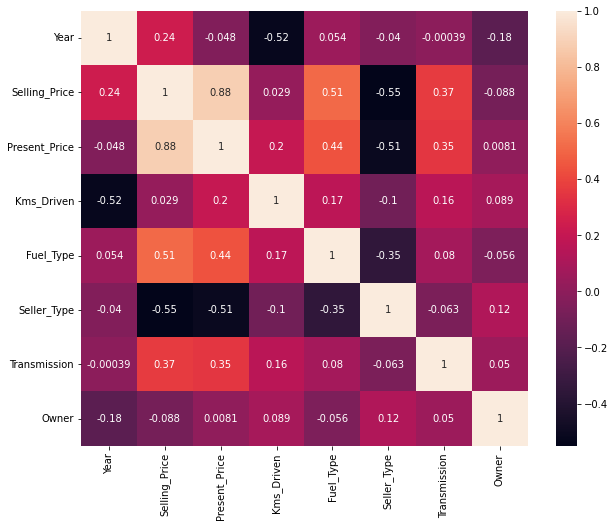

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [61]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [63]:
x = df.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Making the model

In [67]:
model = LinearRegression()

In [68]:
model.fit(x_train, y_train)

LinearRegression()

In [73]:
print(model.coef_)

[ 4.22983576e-01  4.30073088e-01 -3.41037568e-06  1.21803299e+00
 -1.30899559e+00  1.39038873e+00 -1.14977945e+00]


In [74]:
print(model.intercept_)

-850.193314415112


### model Evaluation

In [71]:
print("The Trainig Model Accuracy",model.score(x_train, y_train))

The Trainig Model Accuracy 0.8894763216785266


In [72]:
print("Testing Model Accuracy", model.score(x_test, y_test))

Testing Model Accuracy 0.8371829266705757


### Visualization of Actaul Price vs Predictied Price

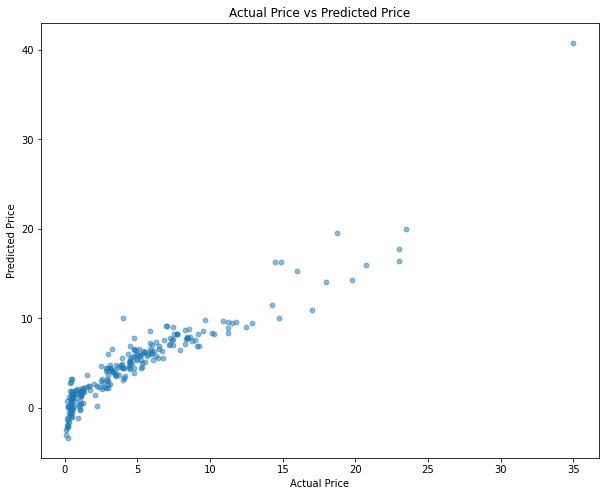

In [92]:
plt.figure(figsize=(10, 8))
plt.scatter(y_train, model.predict(x_train), s=23, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

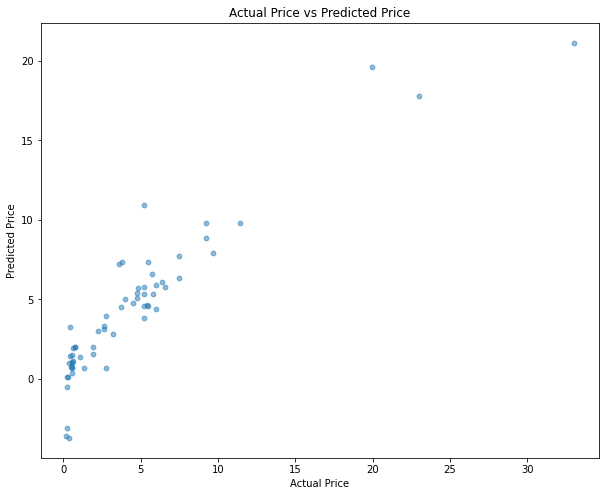

In [84]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, model.predict(x_test), s=23, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Lasso Model

In [86]:
model_2 = Lasso()

In [87]:
model_2.fit(x_train, y_train)

Lasso()

### Evaluation of Model

In [88]:
model_2.score(x_train, y_train)

0.8485354852518125

In [89]:
model_2.score(x_test, y_test)

0.8179608414247148